In [36]:
import torch


In [37]:
#change the device 
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
#importing datasets from torchvision
#dataset - 28x28 MNIST images with one number 

from torchvision.datasets import MNIST
import torchvision.transforms as tfs

#transformation composition
data_tfs = tfs.Compose([tfs.ToTensor(), tfs.Normalize(mean=0.5, std=0.5)])
root = './'
train_data = MNIST(root, train=True, transform=data_tfs, download=True)
test_data = MNIST(root, train=False, transform=data_tfs, download=True)


In [38]:
#import DataLoader to divide train and test data into batches
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_data, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, drop_last=True)

#variables for training process
features = 28*28
classes = 10
epochs = 10
lr = 1e-2
history = []

W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()


tensor([[-0.0195,  0.0040, -0.0291,  ...,  0.0279, -0.0057,  0.0045],
        [-0.0334,  0.0052, -0.0291,  ...,  0.0106, -0.0217, -0.0149],
        [-0.0003, -0.0014, -0.0243,  ...,  0.0123,  0.0268, -0.0013],
        ...,
        [-0.0073,  0.0019, -0.0019,  ...,  0.0254,  0.0038, -0.0243],
        [-0.0048,  0.0050,  0.0044,  ...,  0.0182,  0.0230, -0.0097],
        [-0.0351,  0.0322, -0.0285,  ..., -0.0173, -0.0125,  0.0030]],
       requires_grad=True)

In [39]:
import numpy as np

for epoch_num in range(epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.reshape(x_batch.shape[0], -1)
    logits = x_batch @ W
    probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
    loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
    history.append(loss.data)
    loss.backward()
    grad = W.grad
    #SGD step
    with torch.no_grad():
      W -= lr * grad
    #resetting gradient values
    W.grad.zero_()

In [40]:
import matplotlib.pyplot as plt

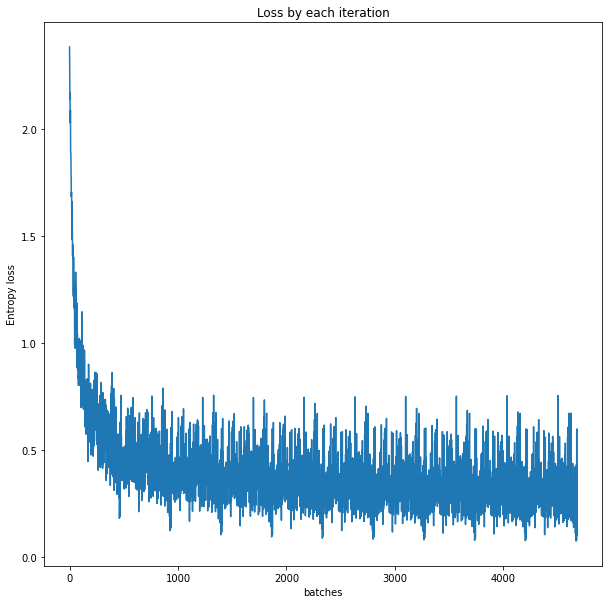

In [41]:
plt.figure(figsize=(10,10))

plt.plot(history)
plt.title('Loss by each iteration')
plt.ylabel('Entropy loss')
plt.xlabel('batches')

plt.show()

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = 0
batches = 0

for x_test_batch, y_test_batch in test_loader:
  batches += 1
  x_test_batch = x_test_batch.reshape(x_test_batch.shape[0], -1)
  #find the max prediction in test label tensor (=prediction on each iteration)
  predictions = torch.argmax(x_test_batch @ W, dim=1)
  accuracy += accuracy_score(y_test_batch, predictions)

print(accuracy / batches)
#accuracy will be ~0.91

0.9127604166666666
